# Overall Objective:
To master the fundamentals of ipywidgets by designing, styling, and building a feature-rich, multi-tab application that includes a chat interface and file-handling tools.



## 1. Introduction & Setup
This first section sets up the entire environment for our project. It imports ipywidgets for creating the interactive user interface, IPython.display for rendering HTML and other rich content, and other necessary libraries like numpy and matplotlib for the data plotting tool we will build later.



In [2]:
# --- Section 1: Setup & Imports ---
import ipywidgets as widgets
from IPython.display import display, HTML
import io
import time
import numpy as np
import matplotlib.pyplot as plt

print("Setup complete. All necessary libraries are ready.")

Setup complete. All necessary libraries are ready.


## 2. Core Widget Showcase
Before building our application, it's important to understand the basic building blocks. This section demonstrates a variety of common ipywidgets, showing what they look like and what kind of input they are used for. We will use several of these to construct our application.



In [3]:
# --- Section 2: Core Widget Showcase ---
print("--- A Showcase of Common Widgets ---")

# Create a collection of different widgets to demonstrate their functionality
text_widget = widgets.Text(description='Name:')
slider_widget = widgets.IntSlider(value=7, min=0, max=10, description='Count:')
checkbox_widget = widgets.Checkbox(value=True, description='Confirm?')
dropdown_widget = widgets.Dropdown(options=['Analysis', 'Training', 'Deployment'], description='Phase:')
date_widget = widgets.DatePicker(description='Select Date')
color_widget = widgets.ColorPicker(description='Pick Color', value='skyblue')

# Display them all in a vertical box for a clean presentation
showcase_box = widgets.VBox([
    text_widget, slider_widget, checkbox_widget,
    dropdown_widget, date_widget, color_widget
])
display(showcase_box)

--- A Showcase of Common Widgets ---


## 3. Designing a Styled Chat Interface
This section focuses on creating the visual components for our main chat interface. We use the Layout widget to control size, borders, and margins (similar to CSS). We also use the HTML widget for a styled header and add a "Clear" button for better user experience. These components are then assembled into a single layout variable, chatbot_tab_content.





In [4]:
# --- Section 3: Styling and Assembling the Chat UI ---
print("--- Building Styled Chat UI Components ---")

# An HTML widget for a styled title
header_html = widgets.HTML(value="<h1 style='color: #4A90E2;'>Interactive Chat App</h1>")

# A styled Output widget for our scrollable chat history
chat_history = widgets.Output(layout={'height': '300px', 'border': '1px solid #ccc', 'padding': '10px', 'overflow': 'scroll'})

# A styled input bar with a 'Send' and 'Clear' button
prompt_input_styled = widgets.Textarea(placeholder='Type your message...', layout={'width': 'calc(100% - 180px)'})
send_button_styled = widgets.Button(description='Send', button_style='info', icon='paper-plane', layout={'width': '100px'})
clear_button = widgets.Button(description='Clear', button_style='warning', icon='trash', layout={'width': '70px'})
input_bar_styled = widgets.HBox([prompt_input_styled, send_button_styled, clear_button])

# The complete layout for the chatbot tab
chatbot_tab_content = widgets.VBox([header_html, chat_history, input_bar_styled])

print("Styled chat UI is assembled and ready to be linked to logic.")
display(chatbot_tab_content)

--- Building Styled Chat UI Components ---
Styled chat UI is assembled and ready to be linked to logic.


## 4. Implementing the Interactive Chat Logic
This section defines the "brain" of our chatbot. We create a mock backend function (get_bot_response) to simulate replies. Then, we create two "handler" functions: on_send_button_clicked to process user input and display the conversation, and on_clear_button_clicked to clear the chat history. The send handler also includes a "Bot is typing..." indicator to make the UI feel more responsive.



In [5]:
# --- Section 4: Chatbot Logic and Handlers ---
def get_bot_response(user_text):
    """A mock backend function with more keyword-based replies."""
    user_text_lower = user_text.lower()
    if "hello" in user_text_lower: return "Hello there! How can I assist you today?"
    if "style" in user_text_lower: return "Styling uses `widgets.Layout` for size/borders and `HTML` for rich text."
    if "file" in user_text_lower: return "You can handle files with the 'File Inspector' and 'Multi-File Viewer' tabs."
    if "widget" in user_text_lower: return "This UI is built with `ipywidgets`! We are using VBox, HBox, Tab, Button, and Output widgets."
    if "help" in user_text_lower: return "You can ask me about 'hello', 'style', 'file', or 'widget'."
    return f"I am a simple mock bot. You said: '{user_text}'."

# Handler for the "Send" button
def on_send_button_clicked(b):
    user_text = prompt_input_styled.value
    if not user_text: return

    with chat_history:
        display(HTML(f"<div style='background-color: #E1F5FE; padding: 8px; border-radius: 5px; margin: 5px;'><b>You:</b> {user_text}</div>"))

    send_button_styled.disabled = True
    clear_button.disabled = True
    with chat_history:
        display(HTML(f"<div style='background-color: #F1F8E9; padding: 8px; border-radius: 5px; margin: 5px;'><i>Bot is typing...</i></div>"))
    time.sleep(1) # Simulate a processing delay

    bot_text = get_bot_response(user_text)
    with chat_history:
        chat_history.outputs = chat_history.outputs[:-1] # Remove the "typing..." message
        display(HTML(f"<div style='background-color: #F1F8E9; padding: 8px; border-radius: 5px; margin: 5px;'><b>Bot:</b> {bot_text}</div>"))

    prompt_input_styled.value = ""
    send_button_styled.disabled = False
    clear_button.disabled = False

# Handler for the "Clear" button
def on_clear_button_clicked(b):
    chat_history.clear_output()

# Link the handlers to the button click events
send_button_styled.on_click(on_send_button_clicked)
clear_button.on_click(on_clear_button_clicked)

print("✅ The chatbot UI is now fully interactive!")

✅ The chatbot UI is now fully interactive!


## 5. Building the "File Inspector" Tool
This section creates our second tool. It consists of a FileUpload widget for single-file uploads, a button, and an output area. The handler function is designed to be generic: it reads the file's metadata (name, size, type) and attempts to show a text preview if possible. This demonstrates how to handle any type of file.

In [6]:
# --- Section 5: File Inspector Tool ---
file_uploader_single = widgets.FileUpload(description='Upload File', accept='*/*')
inspect_button = widgets.Button(description='Inspect File', button_style='primary', icon='search')
inspector_output = widgets.Output(layout={'border': '1px solid #ccc', 'padding': '10px'})
inspector_tab_content = widgets.VBox([widgets.HTML("<h3>Generic File Inspector</h3>"), widgets.HBox([file_uploader_single, inspect_button]), inspector_output])

def on_inspect_button_clicked(b):
    with inspector_output:
        inspector_output.clear_output(wait=True)
        uploaded_file = file_uploader_single.value
        if not uploaded_file: print("Please upload a file."); return

        file_info = list(uploaded_file.values())[0]
        metadata = file_info['metadata']

        print(f"--- File Metadata ---")
        print(f"  - Name: {metadata['name']}\n  - Size: {metadata['size']} bytes\n  - Type: {metadata['type']}")

        try: print("\n--- Text Preview ---\n" + file_info['content'].decode('utf-8')[:500] + "...")
        except: print("\n(Cannot display preview of this binary file type)")

inspect_button.on_click(on_inspect_button_clicked)
print("File Inspector tool created and is interactive.")
display(inspector_tab_content) # Display this tool for testing

File Inspector tool created and is interactive.


## 6. Building the "Interactive Data Plotter"
This section demonstrates a more advanced use case for ipywidgets: controlling data visualizations. We create a UI with a dropdown to select a plot type and a slider to choose the number of data points. The handler function generates random data and uses matplotlib to create and display the selected plot inside the output widget.



In [7]:
# --- Section 6: Interactive Data Plotter Tool ---
plot_type_selector = widgets.Dropdown(options=['Bar Chart', 'Line Chart', 'Scatter Plot'], description='Plot Type:')
data_points_slider = widgets.IntSlider(value=10, min=5, max=50, description='# of Points:')
plot_button = widgets.Button(description='Generate Plot', button_style='success', icon='bar-chart')
plot_output = widgets.Output(layout={'border': '1px solid #ccc', 'padding': '10px'})
plotter_tab_content = widgets.VBox([widgets.HTML("<h3>Interactive Data Plotter</h3>"), widgets.HBox([plot_type_selector, data_points_slider]), plot_button, plot_output])

def on_plot_button_clicked(b):
    with plot_output:
        plot_output.clear_output(wait=True)
        plot_type, num_points = plot_type_selector.value, data_points_slider.value

        x, y = np.arange(num_points), np.random.randint(20, 100, size=num_points)

        fig, ax = plt.subplots()
        if plot_type == 'Bar Chart': ax.bar(x, y, color='skyblue')
        elif plot_type == 'Line Chart': ax.plot(x, y, color='coral', marker='o')
        elif plot_type == 'Scatter Plot': ax.scatter(x, y, color='purple')

        ax.set_title(f'{plot_type} with {num_points} Data Points')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        plt.show(fig)

plot_button.on_click(on_plot_button_clicked)
print("Interactive Data Plotter tool created.")
display(plotter_tab_content) # Display this tool for testing

Interactive Data Plotter tool created.


## 7. Final Assembly and Showcase
Explanation: The final section brings all our separate tools together into a single, polished, multi-tab application. The widgets.Tab is the container, and its children are the VBox layouts we created for each of our tools.



In [8]:
# --- Section 8: Final Multi-Tool Application ---

# Create the final tab container
final_app = widgets.Tab()

# Assign the content of each tool to a tab
final_app.children = [chatbot_tab_content, inspector_tab_content, plotter_tab_content]

# Set the title for each tab
final_app.set_title(0, 'Chatbot')
final_app.set_title(1, 'File Inspector')
final_app.set_title(2, 'Data Plotter')

# --- Final Display ---
print("="*50)
print("    Final Multi-Tool Application is Ready!")
print("="*50)
display(final_app)

    Final Multi-Tool Application is Ready!


## 1: Install Dependencies
This cell installs all necessary libraries for the application to run.

In [ ]:
# -*- coding: utf-8 -*-
# Install all required libraries quietly
!pip install ipywidgets transformers torch sentencepiece huggingface_hub pypdf evaluate scikit-learn sentence-transformers matplotlib seaborn pandas nltk textstat rouge_score --quiet
# accelerate is needed for efficient multi-device model loading
!pip install accelerate --quiet
print("✅ All dependencies installed successfully.")

## 2: Import Libraries & Authenticate
This cell imports the required Python modules and securely logs into the Hugging Face Hub using your Colab secret.

In [ ]:
import os
import ipywidgets as widgets
from IPython.display import display, HTML
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import userdata
from huggingface_hub import login
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import numpy as np
import pypdf
import evaluate
import nltk
import io
import warnings
import time
import textstat
from math import pi

# --- 0. SETUP AND AUTHENTICATION ---
warnings.filterwarnings("ignore")

# CORRECTED: Download the 'punkt' resource and the specific 'punkt_tab' to fix the TextRank error
try:
    nltk.download('punkt', quiet=True)
    nltk.download('punkt_tab', quiet=True) # <-- This line explicitly fixes the error
except Exception as e:
    print(f"Error downloading NLTK data: {e}")

# Securely get the token from Colab secrets
try:
    HF_TOKEN = userdata.get('HF_TOKEN')
    login(token=HF_TOKEN)
    print("✅ Hugging Face Hub login successful.")
except Exception as e:
    print(f"🛑 Hugging Face Hub login failed. Please ensure you have set the 'HF_TOKEN' secret correctly.")
    print(f"Error: {e}")

✅ Hugging Face Hub login successful.


## 3: Load AI Models (Pre-computation)
This crucial, one-time step loads all the AI models into memory before any UI is displayed. This ensures the application is fast and responsive during use.

In [ ]:
# --- 1. LOAD MODELS (PRE-COMPUTATION) ---
print("Loading small, fast models... This should be quicker now. ⏳")

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Model Dictionary to hold all loaded models
MODELS = {}

try:
    # Model 1: TinyLlama-1.1B-Chat (Open, 1.1B)
    model_id_tiny = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
    MODELS['tinyllama'] = {
        'tokenizer': AutoTokenizer.from_pretrained(model_id_tiny),
        'model': AutoModelForCausalLM.from_pretrained(
            model_id_tiny,
            torch_dtype=torch.bfloat16,
            device_map="auto",
        ),
        'name': "TinyLlama-1.1B-Chat"
    }
    print("✅ Loaded TinyLlama-1.1B-Chat.")

    # Model 2: Phi-1.5 (Restricted License, 1.3B)
    model_id_phi = "microsoft/phi-1.5"
    MODELS['phi'] = {
        'tokenizer': AutoTokenizer.from_pretrained(model_id_phi, trust_remote_code=True),
        'model': AutoModelForCausalLM.from_pretrained(
            model_id_phi,
            torch_dtype=torch.bfloat16,
            device_map="auto",
            trust_remote_code=True
        ),
        'name': "Phi-1.5"
    }
    print("✅ Loaded Phi-1.5.")

    # Model 3: BART (Public Baseline, ~400M)
    model_id_bart = "facebook/bart-large-cnn"
    MODELS['bart'] = {
        'summarizer': pipeline("summarization", model=model_id_bart, device=0 if device=="cuda" else -1),
        'name': 'BART-Large-CNN'
    }
    print("✅ Loaded BART-Large-CNN.")

    # Model 4: Sentence Transformer (for Extractive Baseline)
    MODELS['embedding'] = {
        'model': SentenceTransformer('all-MiniLM-L6-v2', device=device),
        'name': 'TextRank (Embeddings)'
    }
    print("✅ Loaded Sentence Transformer for TextRank.")

    print("\n🎉 All models loaded successfully!")
except Exception as e:
    print(f"🛑 Error loading models: {e}. Please check your token and model access permissions.")
    exit()

rouge_metric = evaluate.load("rouge")

Loading small, fast models... This should be quicker now. ⏳
Using device: cuda
✅ Loaded TinyLlama-1.1B-Chat.
✅ Loaded Phi-1.5.


Device set to use cuda:0


✅ Loaded BART-Large-CNN.
✅ Loaded Sentence Transformer for TextRank.

🎉 All models loaded successfully!


## 4: Define Shared Backend Logic
This cell contains all the shared helper functions for processing text, running models, calculating the enhanced metrics, and creating plots. Both UIs will use these functions.



In [ ]:
# --- 2. SHARED BACKEND LOGIC ---

# --- Model Inference ---
def generate_with_chat_template_model(model_key, prompt, max_new_tokens=250):
    """Handles models like TinyLlama that use a chat template."""
    tokenizer = MODELS[model_key]['tokenizer']
    model = MODELS[model_key]['model']
    chat = [{"role": "user", "content": prompt}]
    formatted_prompt = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)
    inputs = tokenizer.encode(formatted_prompt, add_special_tokens=False, return_tensors="pt").to(model.device)
    outputs = model.generate(input_ids=inputs, max_new_tokens=max_new_tokens)
    return tokenizer.decode(outputs[0][len(inputs[0]):], skip_special_tokens=True)

def generate_with_instruct_model(model_key, prompt, max_new_tokens=250):
    """Handles models like Phi that use a simple instruction format."""
    tokenizer = MODELS[model_key]['tokenizer']
    model = MODELS[model_key]['model']
    inputs = tokenizer(prompt, return_tensors="pt", return_attention_mask=False).to(model.device)
    outputs = model.generate(**inputs, max_length=len(inputs["input_ids"][0]) + max_new_tokens)
    # Use split to robustly get the content after 'Output:'
    decoded_output = tokenizer.batch_decode(outputs)[0]
    if "Output:" in decoded_output:
        return decoded_output.split("Output:")[1].strip()
    return decoded_output # Fallback if format is unexpected

def summarize_abstractive(text, model_key, max_len=200, min_len=50):
    if model_key == 'tinyllama':
        prompt = f"Provide a concise, abstractive summary of the following text:\n\n{text[:2000]}"
        return generate_with_chat_template_model(model_key, prompt, max_new_tokens=max_len)
    elif model_key == 'phi':
        prompt = f"Instruct: Summarize the following text concisely.\n{text[:2000]}\nOutput:"
        return generate_with_instruct_model(model_key, prompt, max_new_tokens=max_len)
    elif model_key == 'bart':
        return MODELS['bart']['summarizer'](text[:4096], max_length=max_len, min_length=min_len, do_sample=False)[0]['summary_text']
    return "Unsupported model."

def summarize_extractive(text, model_key, num_sentences=5):
    if model_key == 'tinyllama':
        prompt = f"""Your task is extractive summarization. From the text below, extract the {num_sentences} most crucial sentences verbatim.\n\n{text[:2000]}"""
        return generate_with_chat_template_model(model_key, prompt, max_new_tokens=250)
    elif model_key == 'phi':
        prompt = f"Instruct: Extract the {num_sentences} most important sentences verbatim from the following text.\n{text[:2000]}\nOutput:"
        return generate_with_instruct_model(model_key, prompt, max_new_tokens=250)
    elif model_key == 'embedding':
        try:
            sentences = nltk.sent_tokenize(text)
            if len(sentences) <= num_sentences: return "\n".join(sentences)
            embeddings = MODELS['embedding']['model'].encode(sentences, convert_to_tensor=True)
            sim_matrix = cosine_similarity(embeddings.cpu().numpy())
            graph = nx.from_numpy_array(sim_matrix)
            scores = nx.pagerank(graph)
            ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
            return "\n".join([s for _, s in ranked_sentences[:num_sentences]])
        except Exception as e: return f"TextRank failed: {e}"
    return "Unsupported model."

# --- Enhanced Metrics and Visualization ---
def calculate_metrics(summary, original_text, processing_time):
    embedding_model = MODELS['embedding']['model']
    embeddings = embedding_model.encode([original_text, summary])
    semantic_sim = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
    return {
        "ROUGE-1": round(rouge_metric.compute(predictions=[summary], references=[original_text])['rouge1'], 3),
        "ROUGE-2": round(rouge_metric.compute(predictions=[summary], references=[original_text])['rouge2'], 3),
        "Semantic Similarity": round(semantic_sim, 3),
        "Readability": round(textstat.flesch_reading_ease(summary), 2),
        "Length (words)": len(summary.split()),
        "Time (sec)": round(processing_time, 2),
        "Compression": f"{(1 - (len(summary.split()) / len(original_text.split()))) * 100:.1f}%" if len(original_text.split()) > 0 else "N/A"
    }

def create_bar_charts(metrics_df):
    if metrics_df.empty: return None
    df_sorted = metrics_df.sort_values(by=['Model']).reset_index(drop=True)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Model Performance Comparison', fontsize=16)
    sns.barplot(data=df_sorted, x='Model', y='ROUGE-1', ax=axes[0], palette='viridis').tick_params(axis='x', rotation=45)
    axes[0].set_title('ROUGE-1 Score')
    sns.barplot(data=df_sorted, x='Model', y='Semantic Similarity', ax=axes[1], palette='viridis').tick_params(axis='x', rotation=45)
    axes[1].set_title('Semantic Similarity')
    sns.barplot(data=df_sorted, x='Model', y='Time (sec)', ax=axes[2], palette='viridis').tick_params(axis='x', rotation=45)
    axes[2].set_title('Processing Time (seconds)')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    return fig

def create_radar_chart(metrics_df):
    if metrics_df.empty: return None
    metrics_to_plot = ['ROUGE-1', 'Semantic Similarity', 'Readability']
    df_radar = metrics_df.copy()
    df_radar['Readability'] = np.clip(df_radar['Readability'] / 100.0, 0, 1)
    df_avg = df_radar.groupby('Model')[metrics_to_plot].mean().reset_index()
    labels, num_vars = df_avg.columns[1:], len(df_avg.columns[1:])
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    for i, row in df_avg.iterrows():
        values = row.drop('Model').tolist() + [row.drop('Model').tolist()[0]]
        ax.plot(angles, values, label=row['Model'], linewidth=2)
        ax.fill(angles, values, alpha=0.25)
    ax.set_yticklabels([]); ax.set_xticks(angles[:-1]); ax.set_xticklabels(labels)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    ax.set_title("Multi-Metric Model Comparison", size=15, y=1.1)
    return fig

print("✅ Shared backend functions are defined.")

✅ Shared backend functions are defined.


## Section A: Summarize with All Models (Prompt UI)
This UI is simplified for quick comparisons. Just paste your text, choose the summary type, and it will automatically run all compatible models.



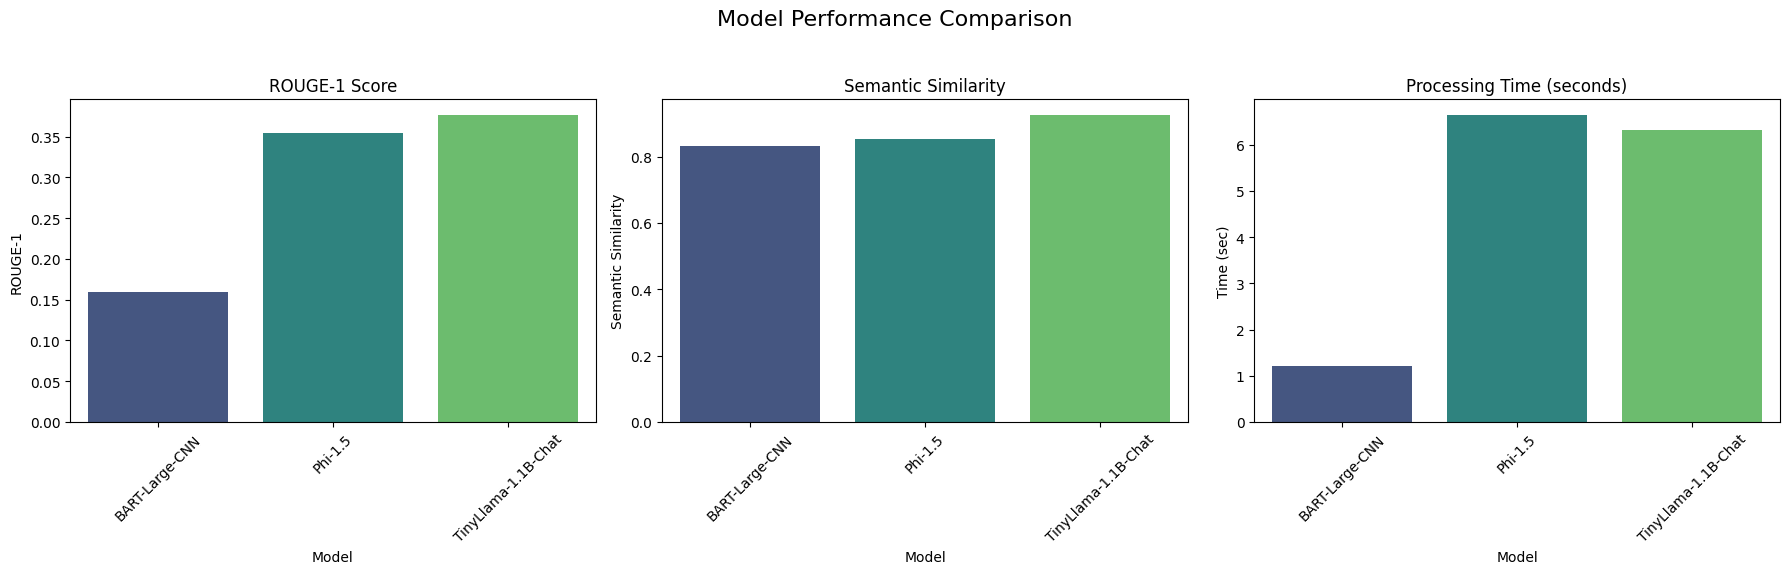

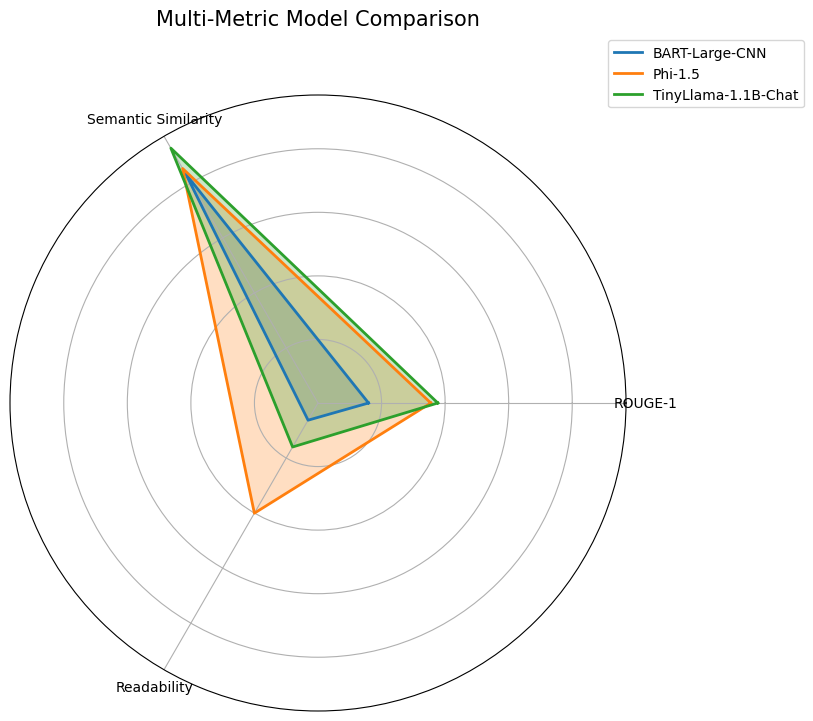

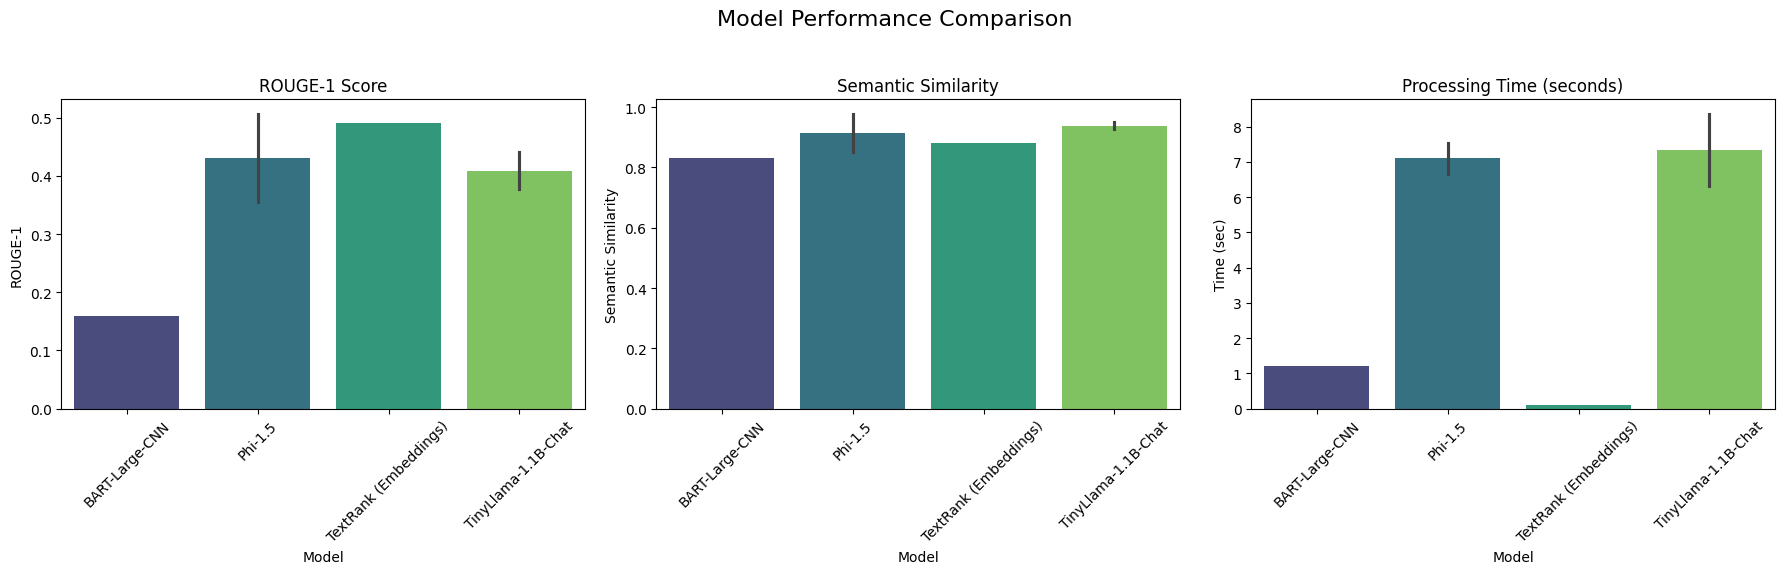

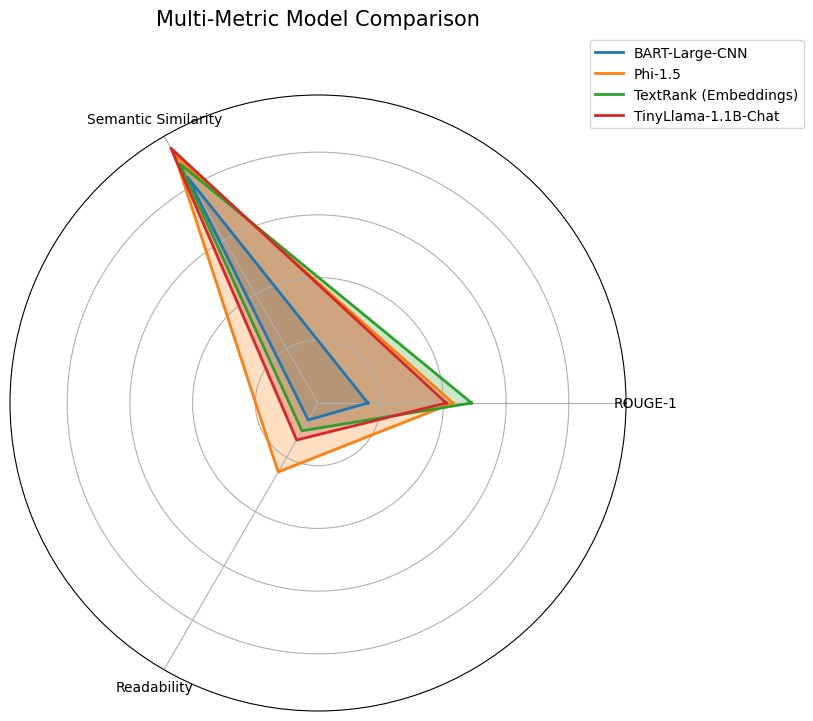

In [ ]:
# --- SECTION A: RUN ALL MODELS UI ---

# --- State and Choices ---
metrics_history_all = []
abstractive_model_choices = {MODELS[k]['name']: k for k in ['tinyllama', 'phi', 'bart']}
extractive_model_choices = {MODELS[k]['name']: k for k in ['tinyllama', 'phi', 'embedding']}

# --- UI Widget Definitions ---
header_all = widgets.HTML("<h2>Section A: Summarize with All Models</h2><p>Paste text and choose a summary type. The system will automatically run all compatible models for a full comparison.</p>")
prompt_input_all = widgets.Textarea(placeholder='Paste your text here to summarize...', layout={'height': '200px', 'width': '99%'})
summary_type_all = widgets.RadioButtons(options=['Abstractive', 'Extractive'], value='Abstractive', description='Summ. Type:')
generate_button_all = widgets.Button(description='🚀 Generate All Summaries', button_style='primary', icon='cogs')
clear_button_all = widgets.Button(description='🧹 Clear Outputs', button_style='warning', icon='trash')

# --- Output Widget Definitions ---
summary_output_all = widgets.Output(layout={'height': '400px', 'border': '1px solid #ccc', 'padding': '10px', 'overflow': 'scroll'})
metrics_table_output_all = widgets.Output()
bar_plot_output_all = widgets.Output()
radar_plot_output_all = widgets.Output()
output_accordion_all = widgets.Accordion(children=[metrics_table_output_all, bar_plot_output_all, radar_plot_output_all])
output_accordion_all.set_title(0, '📊 Metrics Table'); output_accordion_all.set_title(1, '📈 Bar Charts'); output_accordion_all.set_title(2, '✨ Radar Plot')

# --- Event Handlers ---
def on_generate_button_clicked_all(b):
    generate_button_all.disabled = True; generate_button_all.description = "Processing..."
    original_text, s_type = prompt_input_all.value, summary_type_all.value
    if not original_text.strip():
        with summary_output_all: print("⚠️ Please paste text to summarize.")
        generate_button_all.disabled = False; generate_button_all.description = "🚀 Generate All Summaries"; return

    s_keys = list(abstractive_model_choices.values()) if s_type == 'Abstractive' else list(extractive_model_choices.values())

    with summary_output_all: display(HTML(f"<hr><h2>Processing Pasted Text ({s_type})</h2>"))
    for model_key in s_keys:
        model_name = MODELS[model_key]['name']
        with summary_output_all: print(f"⏳ Summarizing with {model_name}...")
        start_time = time.time()
        summary = summarize_abstractive(original_text, model_key) if s_type == "Abstractive" else summarize_extractive(original_text, model_key)
        proc_time = time.time() - start_time
        with summary_output_all: display(HTML(f"<h3>Summary from {model_name}</h3><p>{summary}</p>"))
        metrics = calculate_metrics(summary, original_text, proc_time)
        metrics.update({'Model': model_name, 'File': 'Pasted Text', 'Type': s_type})
        metrics_history_all.append(metrics)

    df = pd.DataFrame(metrics_history_all)
    with metrics_table_output_all: metrics_table_output_all.clear_output(wait=True); display(df)
    with bar_plot_output_all: bar_plot_output_all.clear_output(wait=True); display(create_bar_charts(df))
    with radar_plot_output_all: radar_plot_output_all.clear_output(wait=True); display(create_radar_chart(df))
    generate_button_all.disabled = False; generate_button_all.description = "🚀 Generate All Summaries"

def on_clear_button_clicked_all(b):
    global metrics_history_all; metrics_history_all = []
    summary_output_all.clear_output(); metrics_table_output_all.clear_output()
    bar_plot_output_all.clear_output(); radar_plot_output_all.clear_output()
    prompt_input_all.value = ""
    with summary_output_all: print("Outputs cleared.")

generate_button_all.on_click(on_generate_button_clicked_all)
clear_button_all.on_click(on_clear_button_clicked_all)

# --- Assemble and Display UI with FIXED Layout ---
input_controls_all = widgets.VBox(
    [prompt_input_all, summary_type_all, widgets.HBox([generate_button_all, clear_button_all])],
    layout=widgets.Layout(width='35%', padding='10px', border='1px solid lightgrey', border_radius='5px')
)
output_area_all = widgets.VBox(
    [summary_output_all, output_accordion_all],
    layout=widgets.Layout(width='65%', padding='10px')
)
app_all = widgets.VBox([header_all, widgets.HBox([input_controls_all, output_area_all])])

display(app_all)

## Section B: Summarize with Specific Models (Checkbox UI)
This UI gives you fine-grained control, allowing you to select exactly which models you want to run using checkboxes.



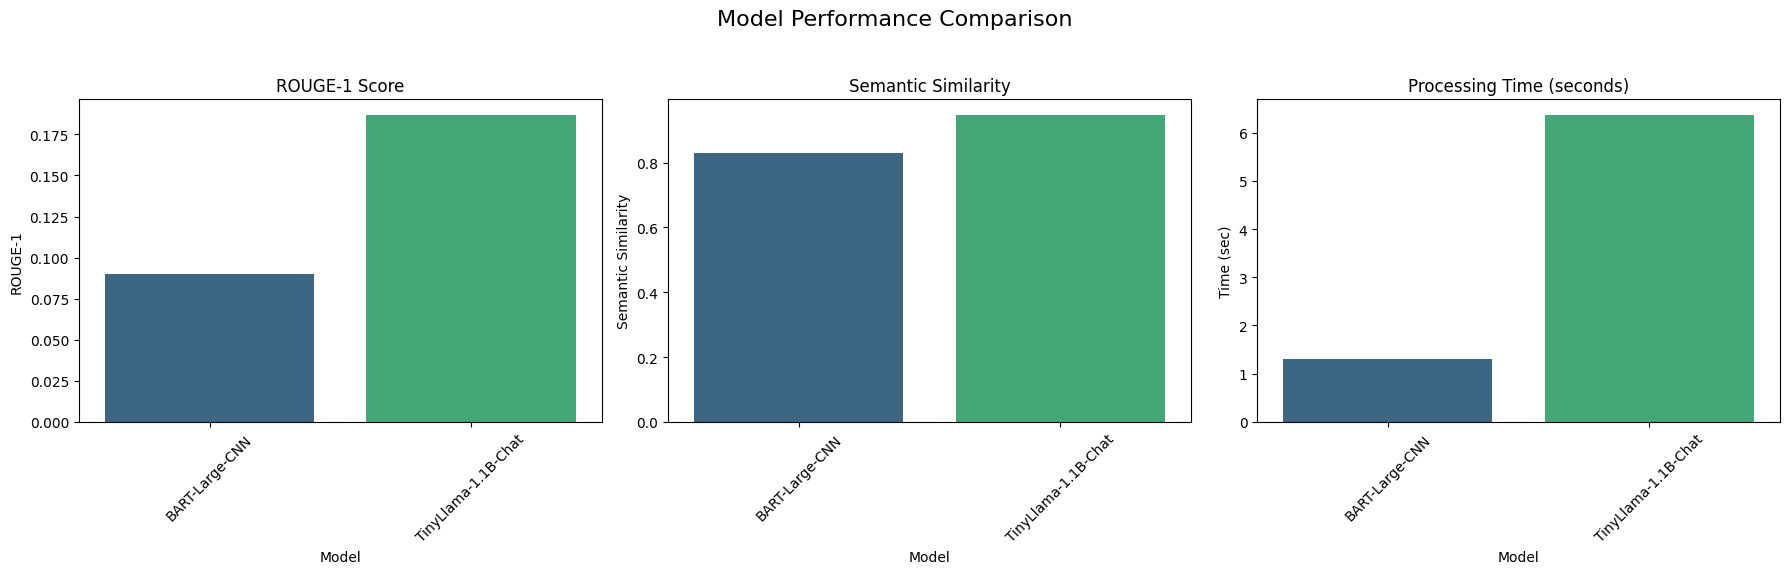

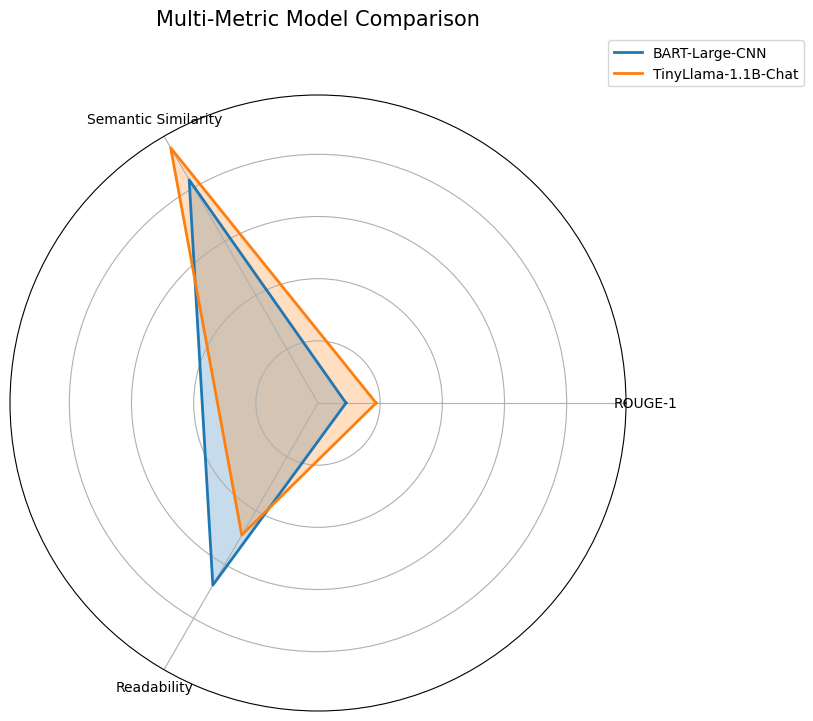

In [ ]:
# --- SECTION B: SELECT SPECIFIC MODELS UI ---

# --- State and Choices ---
metrics_history_specific = []
# (Choices are reused from Section A)

# --- UI Widget Definitions ---
header_specific = widgets.HTML("<h2>Section B: Summarize with Specific Models</h2><p>Paste text, choose a summary type, and check the specific models you want to run.</p>")
prompt_input_specific = widgets.Textarea(placeholder='Paste your text here to summarize...', layout={'height': '200px', 'width': '99%'})
summary_type_specific = widgets.RadioButtons(options=['Abstractive', 'Extractive'], value='Abstractive', description='Summ. Type:')
model_checkboxes_out = widgets.Output() # A container for our dynamic checkboxes
checkboxes = {}
generate_button_specific = widgets.Button(description='🚀 Generate Summaries', button_style='primary', icon='cogs')
clear_button_specific = widgets.Button(description='🧹 Clear Outputs', button_style='warning', icon='trash')

# --- Output Widget Definitions ---
summary_output_specific = widgets.Output(layout={'height': '400px', 'border': '1px solid #ccc', 'padding': '10px', 'overflow': 'scroll'})
metrics_table_output_specific = widgets.Output()
bar_plot_output_specific = widgets.Output()
radar_plot_output_specific = widgets.Output()
output_accordion_specific = widgets.Accordion(children=[metrics_table_output_specific, bar_plot_output_specific, radar_plot_output_specific])
output_accordion_specific.set_title(0, '📊 Metrics Table'); output_accordion_specific.set_title(1, '📈 Bar Charts'); output_accordion_specific.set_title(2, '✨ Radar Plot')

# --- Event Handlers ---
def update_checkboxes(s_type):
    global checkboxes; checkboxes = {}
    choices = abstractive_model_choices if s_type == 'Abstractive' else extractive_model_choices
    with model_checkboxes_out:
        model_checkboxes_out.clear_output(wait=True)
        for name, key in choices.items():
            checkboxes[key] = widgets.Checkbox(value=True, description=name)
        display(widgets.VBox(list(checkboxes.values())))

def on_generate_button_clicked_specific(b):
    generate_button_specific.disabled = True; generate_button_specific.description = "Processing..."
    original_text, s_type = prompt_input_specific.value, summary_type_specific.value
    s_keys = [key for key, cb in checkboxes.items() if cb.value]

    if not original_text.strip() or not s_keys:
        with summary_output_specific: print("⚠️ Please paste text and check at least one model.")
        generate_button_specific.disabled = False; generate_button_specific.description = "🚀 Generate Summaries"; return

    with summary_output_specific: display(HTML(f"<hr><h2>Processing Pasted Text ({s_type})</h2>"))
    for model_key in s_keys:
        model_name = MODELS[model_key]['name']
        with summary_output_specific: print(f"⏳ Summarizing with {model_name}...")
        start_time = time.time()
        summary = summarize_abstractive(original_text, model_key) if s_type == "Abstractive" else summarize_extractive(original_text, model_key)
        proc_time = time.time() - start_time
        with summary_output_specific: display(HTML(f"<h3>Summary from {model_name}</h3><p>{summary}</p>"))
        metrics = calculate_metrics(summary, original_text, proc_time)
        metrics.update({'Model': model_name, 'File': 'Pasted Text', 'Type': s_type})
        metrics_history_specific.append(metrics)

    df = pd.DataFrame(metrics_history_specific)
    with metrics_table_output_specific: metrics_table_output_specific.clear_output(wait=True); display(df)
    with bar_plot_output_specific: bar_plot_output_specific.clear_output(wait=True); display(create_bar_charts(df))
    with radar_plot_output_specific: radar_plot_output_specific.clear_output(wait=True); display(create_radar_chart(df))
    generate_button_specific.disabled = False; generate_button_specific.description = "🚀 Generate Summaries"

def on_clear_button_clicked_specific(b):
    global metrics_history_specific; metrics_history_specific = []
    summary_output_specific.clear_output(); metrics_table_output_specific.clear_output()
    bar_plot_output_specific.clear_output(); radar_plot_output_specific.clear_output()
    prompt_input_specific.value = ""
    with summary_output_specific: print("Outputs cleared.")

def on_summary_type_change_specific(change):
    update_checkboxes(change.new)

generate_button_specific.on_click(on_generate_button_clicked_specific)
clear_button_specific.on_click(on_clear_button_clicked_specific)
summary_type_specific.observe(on_summary_type_change_specific, names='value')

# --- Assemble and Display UI with FIXED Layout ---
input_controls_specific = widgets.VBox(
    [prompt_input_specific, summary_type_specific, widgets.Label("Select Models:"), model_checkboxes_out, widgets.HBox([generate_button_specific, clear_button_specific])],
    layout=widgets.Layout(width='35%', padding='10px', border='1px solid lightgrey', border_radius='5px')
)
output_area_specific = widgets.VBox(
    [summary_output_specific, output_accordion_specific],
    layout=widgets.Layout(width='65%', padding='10px')
)
app_specific = widgets.VBox([header_specific, widgets.HBox([input_controls_specific, output_area_specific])])

# Initial population of checkboxes
update_checkboxes('Abstractive')

display(app_specific)